In [ ]:
!pip install yfinance catboost pandas numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


##Cat Boost Algorithm

[*********************100%***********************]  1 of 1 completed


0:	learn: 418.7860536	total: 3.03ms	remaining: 3.03s
100:	learn: 17.5912556	total: 218ms	remaining: 1.94s
200:	learn: 15.2544962	total: 438ms	remaining: 1.74s
300:	learn: 14.0805965	total: 657ms	remaining: 1.52s
400:	learn: 13.2393605	total: 893ms	remaining: 1.33s
500:	learn: 12.5540511	total: 1.11s	remaining: 1.1s
600:	learn: 11.9644556	total: 1.33s	remaining: 886ms
700:	learn: 11.4650007	total: 1.56s	remaining: 666ms
800:	learn: 11.0425057	total: 1.79s	remaining: 446ms
900:	learn: 10.6056423	total: 2.03s	remaining: 223ms
999:	learn: 10.2110376	total: 2.24s	remaining: 0us
Mean Squared Error: 328.9994686859373


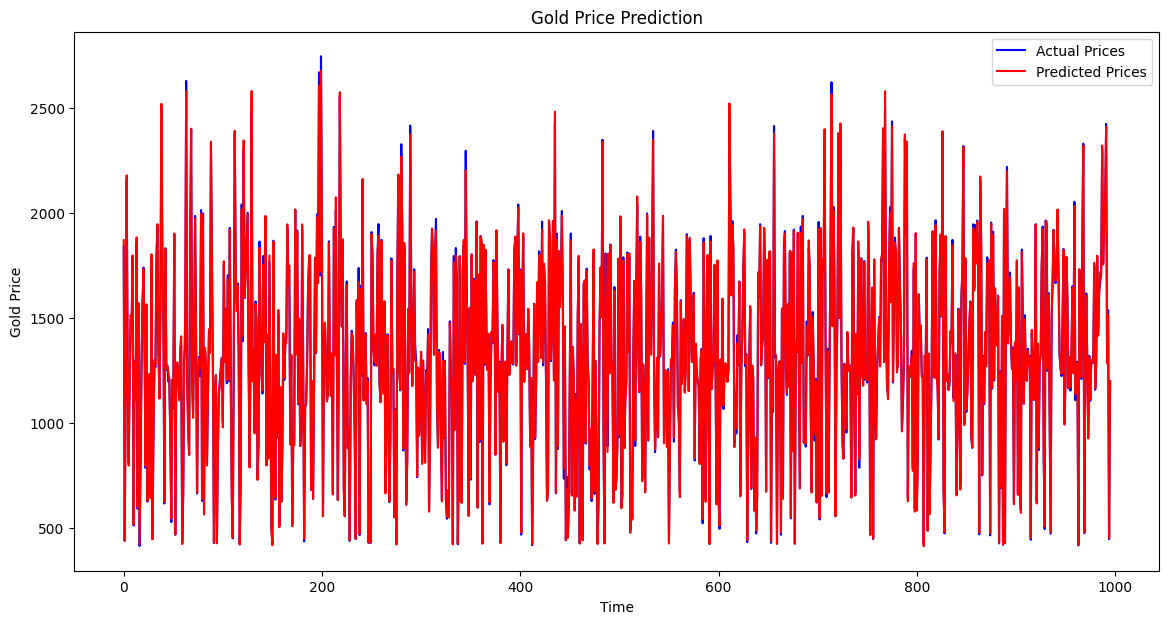

[*********************100%***********************]  1 of 1 completed

Today's Actual Gold Price: $2755.50
Predicted Price for Tomorrow: $2679.91



/usr/local/lib/python3.10/dist-packages/catboost/core.py:1491: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, graph, weight,
<ipython-input-5-7b8c02d3f2bc>:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(latest_row['Close'])  # Ensure it's a float


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Gold Price Data
gold_data = yf.download('GC=F', start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
gold_data['Date'] = gold_data.index
gold_data['Return'] = gold_data['Close'].pct_change()
gold_data['Target'] = gold_data['Close'].shift(-1)  # Predict next day's closing price
gold_data.dropna(inplace=True)

# Features and Target
X = gold_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = gold_data['Target']

# Step 3: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the CatBoost Model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Step 7: Fetch Today’s Price and Predict Tomorrow’s Price
today_data = yf.download('GC=F', period='1d', interval='1m')

if not today_data.empty:
    # Fetch the latest row and prepare it for prediction
    latest_row = today_data.iloc[-1]

    # Construct the feature names to match the model's expected input
    latest_features = pd.DataFrame([{
        'Open': latest_row['Open'],
        'High': latest_row['High'],
        'Low': latest_row['Low'],
        'Close': latest_row['Close'],
        'Volume': latest_row['Volume'],
        'Return': gold_data['Return'].iloc[-1]  # Use the last available return
    }])

    # Rename columns to match model's expected input
    latest_features.columns = X.columns  # Match the training feature names

    # Make the prediction
    predicted_price = model.predict(latest_features)[0]
    today_price = float(latest_row['Close'])  # Ensure it's a float

    print(f"Today's Actual Gold Price: ${today_price:.2f}")
    print(f"Predicted Price for Tomorrow: ${predicted_price:.2f}")
else:
    print("No data available for today's gold price.")



##Random Forest

[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 287.713112159089


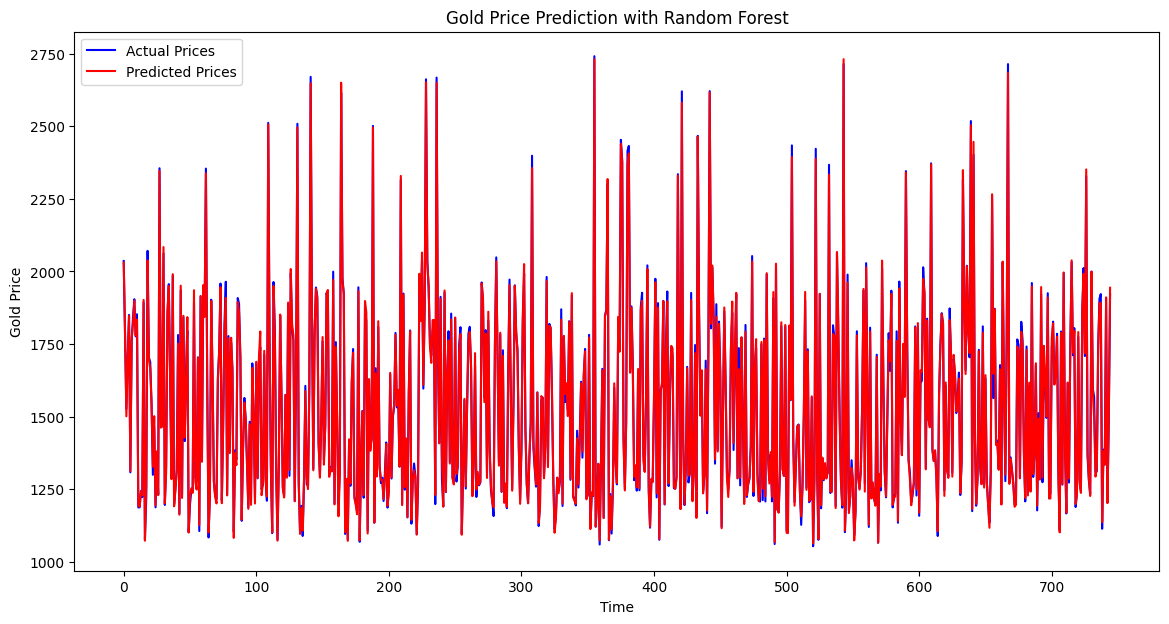

Today's Actual Gold Price: $2734.90
Predicted Price for Tomorrow: $2730.57


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
<ipython-input-11-5781249dfc9f>:58: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(latest_row['Close'])  # Convert to float for correct formatting


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Gold Price Data
gold_data = yf.download('GC=F', start='2010-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
gold_data['Date'] = gold_data.index
gold_data['Return'] = gold_data['Close'].pct_change()
gold_data['Target'] = gold_data['Close'].shift(-1)  # Predict next day's closing price
gold_data.dropna(inplace=True)

# Features and Target
X = gold_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = gold_data['Target']

# Step 3: Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Gold Price Prediction with Random Forest')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Step 7: Print Today's Actual and Predicted Price
latest_row = gold_data.iloc[-1]  # Get the last row for today's price
latest_features = pd.DataFrame({
    'Open': [latest_row['Open']],
    'High': [latest_row['High']],
    'Low': [latest_row['Low']],
    'Close': [latest_row['Close']],
    'Volume': [latest_row['Volume']],
    'Return': [latest_row['Return']]
})

# Make the prediction for today's price
predicted_price = model.predict(latest_features)[0]  # Get the predicted price for today
today_price = float(latest_row['Close'])  # Convert to float for correct formatting

# Print the prices
print(f"Today's Actual Gold Price: ${today_price:.2f}")
print(f"Predicted Price for Tomorrow: ${predicted_price:.2f}")



## Grid Search CV

[*********************100%***********************]  1 of 1 completed


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.9972939921176961
Mean Squared Error: 269.8694059915921


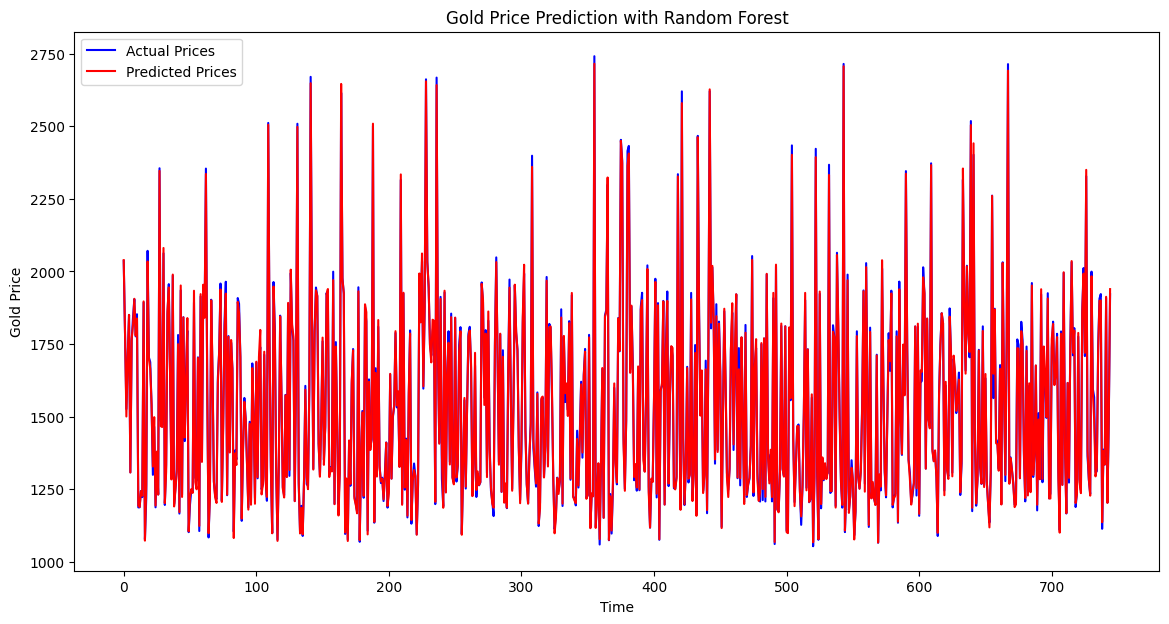

Today's Actual Gold Price: $2734.90
Predicted Price for Tomorrow: $2714.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
<ipython-input-12-933017d07e9d>:78: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(latest_row['Close'])  # Convert to float for correct formatting


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Gold Price Data
gold_data = yf.download('GC=F', start='2010-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
gold_data['Date'] = gold_data.index
gold_data['Return'] = gold_data['Close'].pct_change()
gold_data['Target'] = gold_data['Close'].shift(-1)  # Predict next day's closing price
gold_data.dropna(inplace=True)

# Features and Target
X = gold_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
y = gold_data['Target']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Step 5: Train the Best Model
best_model = grid_search.best_estimator_

# Step 6: Make Predictions
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Gold Price Prediction with Random Forest')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Step 8: Print Today's Actual and Predicted Price
latest_row = gold_data.iloc[-1]  # Get the last row for today's price
latest_features = pd.DataFrame({
    'Open': [latest_row['Open']],
    'High': [latest_row['High']],
    'Low': [latest_row['Low']],
    'Close': [latest_row['Close']],
    'Volume': [latest_row['Volume']],
    'Return': [latest_row['Return']]
})

# Make the prediction for today's price
predicted_price = best_model.predict(latest_features)[0]  # Get the predicted price for today
today_price = float(latest_row['Close'])  # Convert to float for correct formatting

# Print the prices
print(f"Today's Actual Gold Price: ${today_price:.2f}")
print(f"Predicted Price for Tomorrow: ${predicted_price:.2f}")


## Grid Search CV-2

[*********************100%***********************]  1 of 1 completed


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Best cross-validation score:  0.9973736349889526
Mean Squared Error: 323.1259847079243


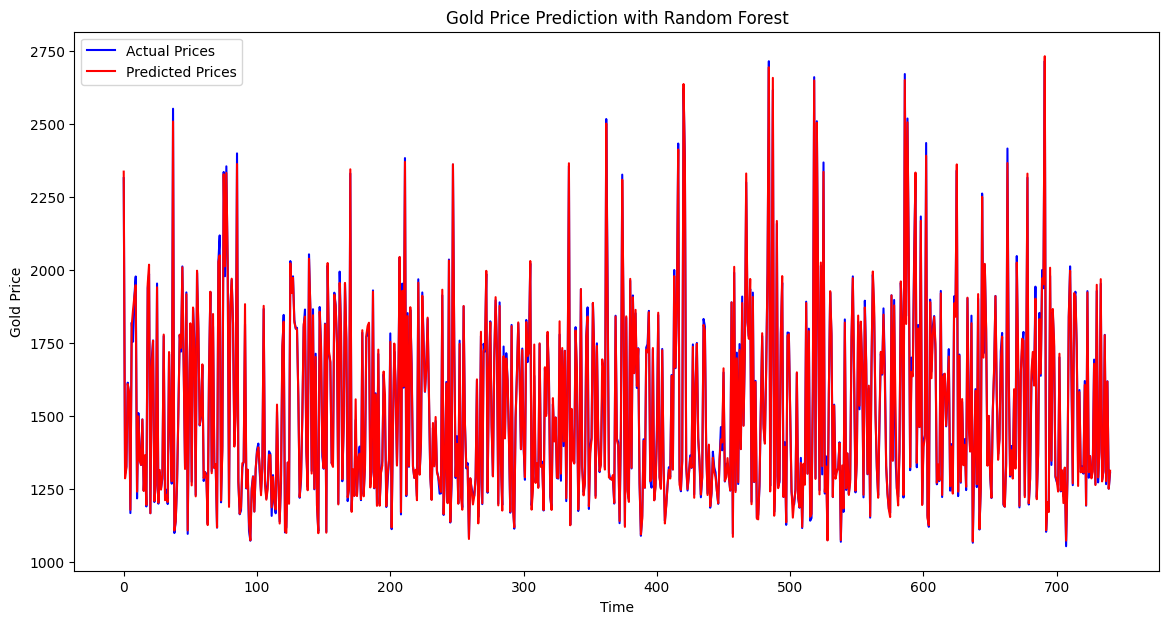

Today's Actual Gold Price: $2734.90
Predicted Price for Tomorrow: $2730.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
<ipython-input-13-207ae7b63711>:97: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(latest_row['Close'])  # Convert to float for correct formatting


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fetch Gold Price Data
gold_data = yf.download('GC=F', start='2010-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
gold_data['Date'] = gold_data.index
gold_data['Return'] = gold_data['Close'].pct_change()
gold_data['Target'] = gold_data['Close'].shift(-1)  # Predict next day's closing price
gold_data.dropna(inplace=True)

# Feature Engineering: Add more features
gold_data['MA_5'] = gold_data['Close'].rolling(window=5).mean()
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_20'] = gold_data['Close'].rolling(window=20).mean()
gold_data['EMA_5'] = gold_data['Close'].ewm(span=5, adjust=False).mean()
gold_data['EMA_10'] = gold_data['Close'].ewm(span=10, adjust=False).mean()
gold_data['Lag_1'] = gold_data['Close'].shift(1)
gold_data['Lag_2'] = gold_data['Close'].shift(2)

gold_data.dropna(inplace=True)

# Features and Target
X = gold_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA_5', 'MA_10', 'MA_20', 'EMA_5', 'EMA_10', 'Lag_1', 'Lag_2']]
y = gold_data['Target']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning with Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Step 5: Train the Best Model
best_model = random_search.best_estimator_

# Step 6: Make Predictions
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Gold Price Prediction with Random Forest')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Step 8: Print Today's Actual and Predicted Price
latest_row = gold_data.iloc[-1]  # Get the last row for today's price
latest_features = pd.DataFrame({
    'Open': [latest_row['Open']],
    'High': [latest_row['High']],
    'Low': [latest_row['Low']],
    'Close': [latest_row['Close']],
    'Volume': [latest_row['Volume']],
    'Return': [latest_row['Return']],
    'MA_5': [latest_row['MA_5']],
    'MA_10': [latest_row['MA_10']],
    'MA_20': [latest_row['MA_20']],
    'EMA_5': [latest_row['EMA_5']],
    'EMA_10': [latest_row['EMA_10']],
    'Lag_1': [latest_row['Lag_1']],
    'Lag_2': [latest_row['Lag_2']]
})

# Make the prediction for today's price
predicted_price = best_model.predict(latest_features)[0]  # Get the predicted price for today
today_price = float(latest_row['Close'])  # Convert to float for correct formatting

# Print the prices
print(f"Today's Actual Gold Price: ${today_price:.2f}")
print(f"Predicted Price for Tomorrow: ${predicted_price:.2f}")


## Grid Search CV-3

[*********************100%***********************]  1 of 1 completed


               Importance
Price  Ticker            
Close  GC=F      0.615979
High   GC=F      0.178537
Low    GC=F      0.153896
Open   GC=F      0.010493
EMA_10           0.009038
EMA_5            0.008199
MA_5             0.005761
Lag_1            0.005684
MA_10            0.004819
MA_20            0.004255
Lag_2            0.003166
Volume GC=F      0.000102
Return           0.000070
Mean Squared Error: 256.8697705412105


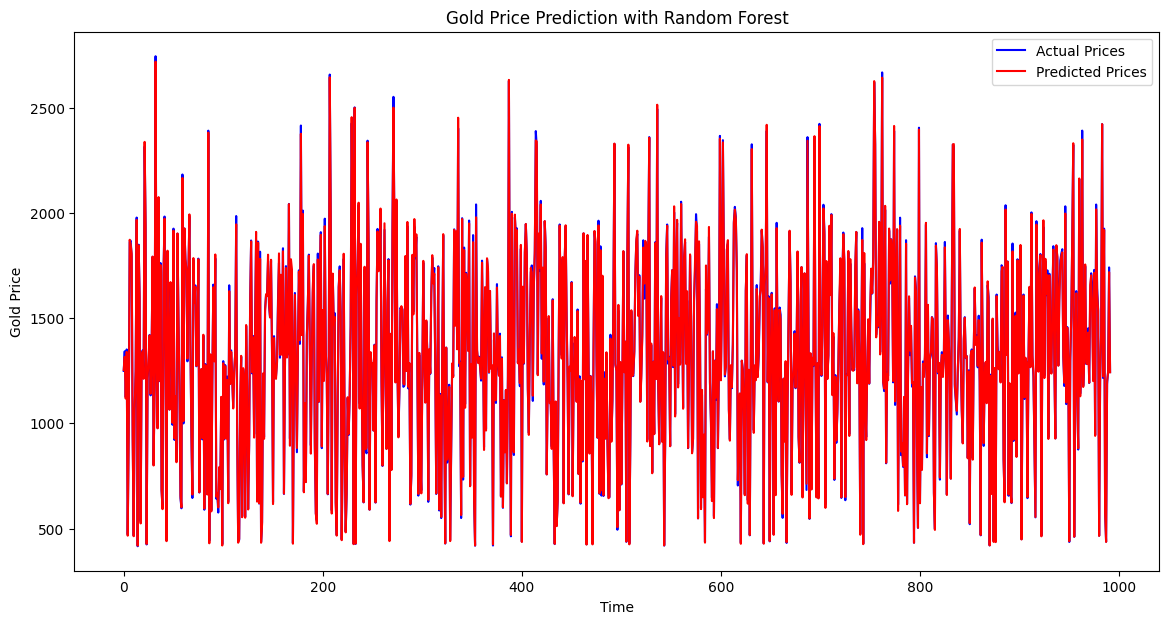

Today's Actual Gold Price: $2734.90
Predicted Price for Tomorrow: $2733.10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
<ipython-input-14-b396cd2ad590>:82: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(latest_row['Close'])  # Convert to float for correct formatting


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fetch Gold Price Data
gold_data = yf.download('GC=F', start='2005-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
gold_data['Date'] = gold_data.index
gold_data['Return'] = gold_data['Close'].pct_change()
gold_data['Target'] = gold_data['Close'].shift(-1)  # Predict next day's closing price
gold_data.dropna(inplace=True)

# Feature Engineering: Add more features
gold_data['MA_5'] = gold_data['Close'].rolling(window=5).mean()
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_20'] = gold_data['Close'].rolling(window=20).mean()
gold_data['EMA_5'] = gold_data['Close'].ewm(span=5, adjust=False).mean()
gold_data['EMA_10'] = gold_data['Close'].ewm(span=10, adjust=False).mean()
gold_data['Lag_1'] = gold_data['Close'].shift(1)
gold_data['Lag_2'] = gold_data['Close'].shift(2)

gold_data.dropna(inplace=True)

# Features and Target
X = gold_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA_5', 'MA_10', 'MA_20', 'EMA_5', 'EMA_10', 'Lag_1', 'Lag_2']]
y = gold_data['Target']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importances)

# Step 6: Make Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 7: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Gold Price Prediction with Random Forest')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Step 8: Print Today's Actual and Predicted Price
latest_row = gold_data.iloc[-1]  # Get the last row for today's price
latest_features = pd.DataFrame({
    'Open': [latest_row['Open']],
    'High': [latest_row['High']],
    'Low': [latest_row['Low']],
    'Close': [latest_row['Close']],
    'Volume': [latest_row['Volume']],
    'Return': [latest_row['Return']],
    'MA_5': [latest_row['MA_5']],
    'MA_10': [latest_row['MA_10']],
    'MA_20': [latest_row['MA_20']],
    'EMA_5': [latest_row['EMA_5']],
    'EMA_10': [latest_row['EMA_10']],
    'Lag_1': [latest_row['Lag_1']],
    'Lag_2': [latest_row['Lag_2']]
})

# Make the prediction for today's price
predicted_price = model.predict(latest_features)[0]  # Get the predicted price for today
today_price = float(latest_row['Close'])  # Convert to float for correct formatting

# Print the prices
print(f"Today's Actual Gold Price: ${today_price:.2f}")
print(f"Predicted Price for Tomorrow: ${predicted_price:.2f}")


## Grid Search CV-4

[*********************100%***********************]  1 of 1 completed

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Mean Squared Error: 303.59976145628946


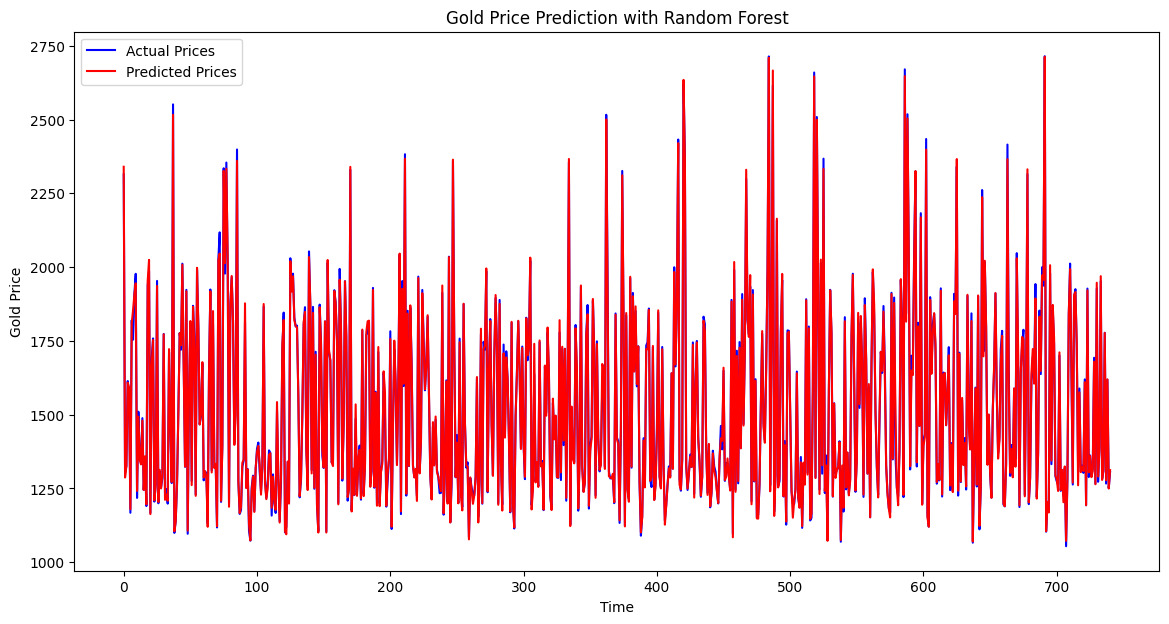

Today's Actual Gold Price: $2734.90
Predicted Price for Tomorrow: $2712.89


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:745: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
<ipython-input-15-b2c55dd6d577>:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  today_price = float(latest_row['Close'])  # Convert to float for correct formatting


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fetch Gold Price Data
gold_data = yf.download('GC=F', start='2010-01-01', end='2024-10-27')

# Step 2: Preprocess the Data
gold_data['Date'] = gold_data.index
gold_data['Return'] = gold_data['Close'].pct_change()
gold_data['Target'] = gold_data['Close'].shift(-1)  # Predict next day's closing price
gold_data.dropna(inplace=True)

# Feature Engineering: Add more features
gold_data['MA_5'] = gold_data['Close'].rolling(window=5).mean()
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_20'] = gold_data['Close'].rolling(window=20).mean()
gold_data['EMA_5'] = gold_data['Close'].ewm(span=5, adjust=False).mean()
gold_data['EMA_10'] = gold_data['Close'].ewm(span=10, adjust=False).mean()
gold_data['Lag_1'] = gold_data['Close'].shift(1)
gold_data['Lag_2'] = gold_data['Close'].shift(2)

gold_data.dropna(inplace=True)

# Features and Target
X = gold_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA_5', 'MA_10', 'MA_20', 'EMA_5', 'EMA_10', 'Lag_1', 'Lag_2']]
y = gold_data['Target']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Step 5: Make Predictions with Best Model
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 6: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Gold Price Prediction with Random Forest')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Step 7: Print Today's Actual and Predicted Price
latest_row = gold_data.iloc[-1]  # Get the last row for today's price
latest_features = pd.DataFrame({
    'Open': [latest_row['Open']],
    'High': [latest_row['High']],
    'Low': [latest_row['Low']],
    'Close': [latest_row['Close']],
    'Volume': [latest_row['Volume']],
    'Return': [latest_row['Return']],
    'MA_5': [latest_row['MA_5']],
    'MA_10': [latest_row['MA_10']],
    'MA_20': [latest_row['MA_20']],
    'EMA_5': [latest_row['EMA_5']],
    'EMA_10': [latest_row['EMA_10']],
    'Lag_1': [latest_row['Lag_1']],
    'Lag_2': [latest_row['Lag_2']]
})

# Make the prediction for today's price
predicted_price = best_model.predict(latest_features)[0]  # Get the predicted price for today
today_price = float(latest_row['Close'])  # Convert to float for correct formatting

# Print the prices
print(f"Today's Actual Gold Price: ${today_price:.2f}")
print(f"Predicted Price for Tomorrow: ${predicted_price:.2f}")
